Top 5 frequency peaks and their magnitudes:
Frequency: 20.78 Hz, Magnitude: 290.05
Frequency: 17.28 Hz, Magnitude: 234.00
Frequency: 11.88 Hz, Magnitude: 232.58
Frequency: 18.98 Hz, Magnitude: 219.17
Frequency: 8.22 Hz, Magnitude: 203.27


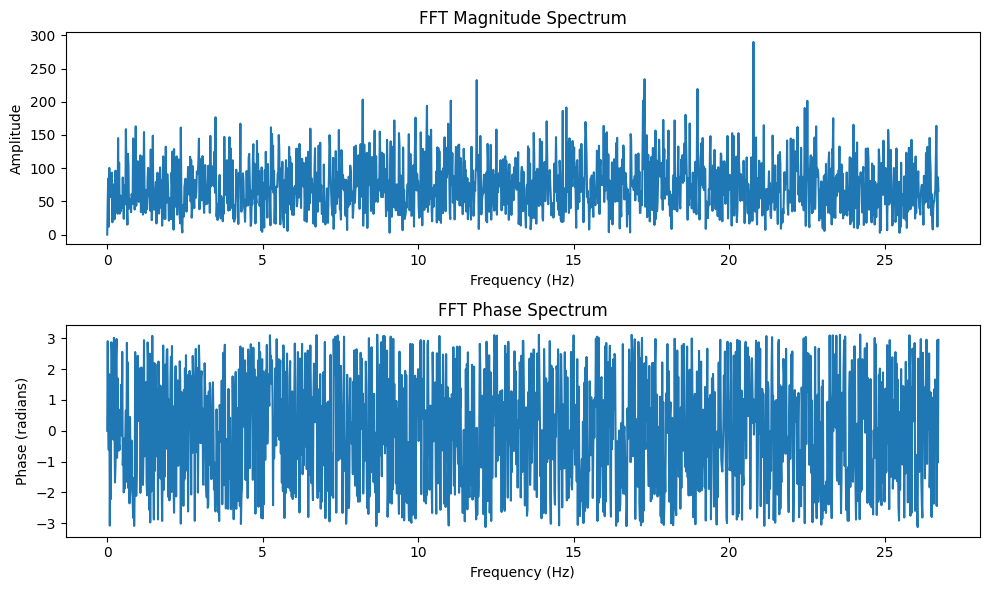

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sound_data.csv')  # access the CSV file
sound_data = df['SoundLevel'].values
sound_data = df['SoundLevel'].values.astype('float64')
sound_data -= np.mean(sound_data)

# Perform FFT
n = len(sound_data)  # number of sampled data
t = 60               # duration of the measurement
sampling_rate = n/t  # sampling frequency（example: 100Hz -> 100）
fft_result = np.fft.fft(sound_data)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# separate into real and imaginary parts
fft_magnitude = np.abs(fft_result)  # amplitude
fft_phase = np.angle(fft_result)    # phase

# See only the positive frequency components
positive_frequencies = frequencies[:n//2]
positive_magnitude = fft_magnitude[:n//2]


# Find the indices of the five largest values in the amplitude spectrum
top_indices = np.argsort(positive_magnitude)[-5:][::-1]
top_frequencies = positive_frequencies[top_indices]
top_magnitudes = positive_magnitude[top_indices]

# Print the top five frequency peaks and their magnitudes
print("Top 5 frequency peaks and their magnitudes:")
for freq, mag in zip(top_frequencies, top_magnitudes):
    print(f"Frequency: {freq:.2f} Hz, Magnitude: {mag:.2f}")

# Plot
plt.figure(figsize=(10, 6))

# Amplitude spectrum
plt.subplot(2, 1, 1)
plt.plot(positive_frequencies, positive_magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# Phase spectrum
plt.subplot(2, 1, 2)
plt.plot(positive_frequencies, fft_phase[:n//2])
plt.title('FFT Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()

In [16]:
sampling_freq = n/60
print(sampling_freq)

53.5
